In [ ]:
import tensorflow as tf
import numpy as np
import glob
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# Load Trained Model

In [ ]:
import tensorflow as tf

MODEL_PATH = "/content/drive/MyDrive/Research-2/best_hand_signal_model.keras"

model = tf.keras.models.load_model(MODEL_PATH, compile = False)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,851 (9.24 MB)

 Trainable params: 2,026,051 (7.73 MB)

 Non-trainable params: 396,800 (1.51 MB)

# Creating representative_data_gen()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

IMG_SIZE = (224, 224)

rep_datagen = ImageDataGenerator(rescale=1./255)

rep_gen = rep_datagen.flow_from_directory(
    "/content/drive/MyDrive/Research-2/datasetn/train",
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode="categorical",
    shuffle=True
)

def representative_data_gen():
    for _ in range(200):
        x, _ = next(rep_gen)
        yield [x.astype(np.float32)]

Found 839 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Research-2/datasetn/test",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 177 images belonging to 3 classes.


# **Convert to INT8**

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

# Full int8 ops
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# Force int8 input/output (true microcontroller style)
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_model = converter.convert()

with open("hand_signal_int8.tflite", "wb") as f:
    f.write(tflite_model)

print("Saved: hand_signal_int8.tflite")


Saved artifact at '/tmp/tmpztgxtfu_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  138107292686608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292689104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292689296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292687376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292689872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292690064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292690448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292690256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292686992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138107292691024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1381072926885

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Saved: hand_signal_int8.tflite


In [ ]:
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/Research-2/hand_signal_int8.tflite")
interpreter.allocate_tensors()
print(interpreter.get_input_details()[0]["dtype"])
print(interpreter.get_input_details()[0]["quantization"])

<class 'numpy.int8'>
(0.003921568859368563, -128)


# TF lite model accuracy

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score

interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/Research-2/hand_signal_int8.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

in_scale, in_zero = input_details[0]["quantization"]

test_gen.reset()
y_true = test_gen.classes
y_pred = []

steps = int(np.ceil(test_gen.samples / test_gen.batch_size))

for _ in range(steps):
    x_batch, _ = next(test_gen)  # x_batch must be in [0,1] because rescale=1./255
    B = x_batch.shape[0]

    for i in range(B):
        x = x_batch[i:i+1]  # (1,224,224,3)

        # float [0,1] -> int8
        x_q = (x / in_scale + in_zero).round().astype(np.int8)

        interpreter.set_tensor(input_details[0]["index"], x_q)
        interpreter.invoke()

        y = interpreter.get_tensor(output_details[0]["index"])  # int8 or int?
        y_pred.append(int(np.argmax(y, axis=1)[0]))

y_pred = np.array(y_pred)[:len(y_true)]
print("TFLite INT8 Accuracy:", accuracy_score(y_true, y_pred))

TFLite INT8 Accuracy: 1.0


In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.metrics import accuracy_score

# interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/Research-2/hand_signal_int8.tflite")
# interpreter.allocate_tensors()

# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# in_scale, in_zero = input_details[0]["quantization"]
# out_scale, out_zero = output_details[0]["quantization"]

# test_gen.reset()
# y_true = test_gen.classes
# y_pred = []

# steps = int(np.ceil(test_gen.samples / test_gen.batch_size))

# for _ in range(steps):
#     x_batch, _ = next(test_gen)
#     B = x_batch.shape[0]

#     for i in range(B):
#         x = x_batch[i:i+1]  # (1,224,224,3)

#         # float -> int8
#         x_q = (x / in_scale + in_zero).round().astype(np.int8)

#         interpreter.set_tensor(input_details[0]["index"], x_q)
#         interpreter.invoke()

#         y_q = interpreter.get_tensor(output_details[0]["index"])

#         # int8 -> float (optional; argmax works on y_q too, but keep as you have)
#         y_f = (y_q.astype(np.float32) - out_zero) * out_scale
#         y_pred.append(int(np.argmax(y_f, axis=1)[0]))

# y_pred = np.array(y_pred)[:len(y_true)]
# print("TFLite INT8 Accuracy:", accuracy_score(y_true, y_pred))

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


TFLite INT8 Accuracy: 0.4067796610169492


In [ ]:
print("Test samples:", test_gen.samples)
print("Test distribution:", np.bincount(test_gen.classes))
print("Test folder:", test_gen.directory)

Test samples: 177
Test distribution: [59 59 59]
Test folder: /content/drive/MyDrive/Research-2/datasetn/test


In [ ]:
print("class_indices:", test_gen.class_indices)

class_indices: {'freeze': 0, 'halt': 1, 'pistol': 2}


In [ ]:
print("shuffle:", test_gen.shuffle)

shuffle: False


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

test_gen.reset()
steps = int(np.ceil(test_gen.samples / test_gen.batch_size))

float_probs = model.predict(test_gen, steps=steps, verbose=1)
y_pred_float = np.argmax(float_probs, axis=1)[:test_gen.samples]
y_true = test_gen.classes

print("Float Keras Accuracy:", accuracy_score(y_true, y_pred_float))


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step
Float Keras Accuracy: 0.9943502824858758


# Confusion Matrix

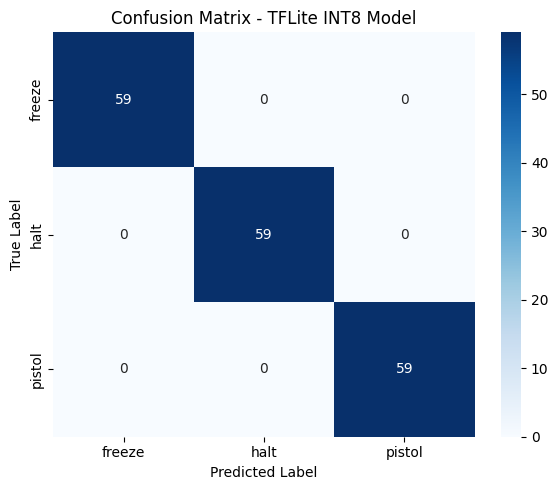

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true   # true labels
y_pred   # predicted labels

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=list(test_gen.class_indices.keys()),
    yticklabels=list(test_gen.class_indices.keys())
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - TFLite INT8 Model")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))


[[39 16  4]
 [36 20  3]
 [42  4 13]]
              precision    recall  f1-score   support

      freeze       0.33      0.66      0.44        59
        halt       0.50      0.34      0.40        59
      pistol       0.65      0.22      0.33        59

    accuracy                           0.41       177
   macro avg       0.49      0.41      0.39       177
weighted avg       0.49      0.41      0.39       177



In [ ]:
print(input_details)

[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.003921568859368563, -128), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
print(input_details[0]["dtype"])
print(input_details[0]["quantization"])

<class 'numpy.int8'>
(0.003921568859368563, -128)
